In [122]:
import pandas as pd
df = pd.read_csv("/Users/sujithrathod/D_learning/Basic/Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [124]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [125]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [126]:
df.drop(columns=["Serial No."],axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [127]:
df.duplicated().sum()

0

In [128]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [129]:
x = df.drop(columns=["Chance of Admit "],axis=1)
y = df["Chance of Admit "]

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.fit_transform(x_test)


In [132]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

In [133]:
model = Sequential()

model.add(Dense(7,activation="relu",input_dim = 7))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation= "linear"))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [135]:
model.compile(loss = "mean_squared_error",optimizer="Adam")

In [136]:
histroy = model.fit(x_train_scaler,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8794 - val_loss: 0.8412
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7454 - val_loss: 0.6951
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6115 - val_loss: 0.5877
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5278 - val_loss: 0.5041
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4501 - val_loss: 0.4312
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3794 - val_loss: 0.3666
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3220 - val_loss: 0.3087
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2760 - val_loss: 0.2562
Epoch 9/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2222 - val_loss: 0.2089
Epoch 10/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1837 - val_loss: 0.1665
Epoch 11/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1423 - val_loss: 0.1299
Epoch 12/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1128 - val_loss: 0.0986
Epoch 13/25


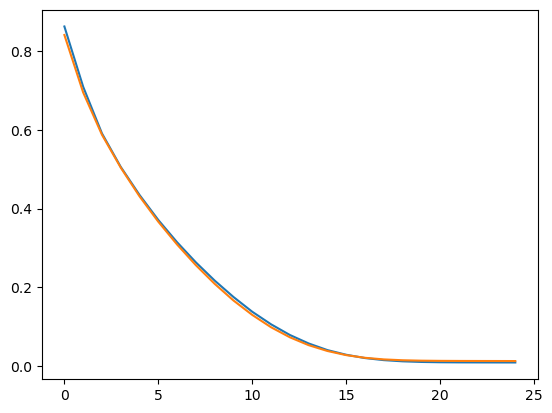

In [139]:
import matplotlib.pyplot as plt
plt.plot(histroy.history["loss"])
plt.plot(histroy.history["val_loss"])

In [137]:
y_pred = model.predict(x_test_scaler)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [138]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6507321507616111